In [1]:
PATH='/home/kirana/Documents/phd/exp3_autoencoder'
DATAPATH='/home/kirana/Documents/final_dissertation_final/experiments/datasets/filmtrust'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import os
import pickle
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn

In [3]:
[df, df_train,df_valid,df,df_ratings,dfflagtrain,dfflagvalid,idx_to_user,\
             idx_to_movie,movie_to_idx,user_to_idx]=pickle.load(open(f'{DATAPATH}/reads.pkl','rb'))

In [4]:
df.shape

(35494, 14)

In [5]:
df.head()

,userId,itemId,rating,mean_on_self,min_on_self,max_on_self,mean_on_other,min_on_other,max_on_other,random_dstype,user_idx,item_idx,dstype_random_train,dstype_random_valid
3297,159,241,0.5,1.0,1.0,1.0,NaN,NaN,NaN,train,1,1,1,0
16463,673,7,3.0,NaN,NaN,NaN,NaN,NaN,NaN,train,2,2,1,0
35390,1502,255,3.5,NaN,NaN,NaN,NaN,NaN,NaN,train,3,3,1,0
5367,224,10,4.0,1.0,1.0,1.0,NaN,NaN,NaN,train,4,4,1,0
13666,557,9,4.0,NaN,NaN,NaN,NaN,NaN,NaN,train,5,5,1,0


In [6]:
df_train=df.loc[df['random_dstype']=='train']
df_valid=df.loc[df['random_dstype']!='train']

In [7]:
df_train.head()

,userId,itemId,rating,mean_on_self,min_on_self,max_on_self,mean_on_other,min_on_other,max_on_other,random_dstype,user_idx,item_idx,dstype_random_train,dstype_random_valid
3297,159,241,0.5,1.0,1.0,1.0,NaN,NaN,NaN,train,1,1,1,0
16463,673,7,3.0,NaN,NaN,NaN,NaN,NaN,NaN,train,2,2,1,0
35390,1502,255,3.5,NaN,NaN,NaN,NaN,NaN,NaN,train,3,3,1,0
5367,224,10,4.0,1.0,1.0,1.0,NaN,NaN,NaN,train,4,4,1,0
13666,557,9,4.0,NaN,NaN,NaN,NaN,NaN,NaN,train,5,5,1,0


### Add the autoencoder features

In [8]:
import pickle

In [9]:
[df_train_user_autoenc,df_valid_user_autoenc,user_mtx_1_weights,user_mtx_2_weights]=\
    pickle.load(open(f'{DATAPATH}/inter/user_autoenc_weights.pkl','rb'))

In [10]:
[df_train_item_autoenc, df_valid_item_autoenc,item_mtx_1_weights,item_mtx_2_weights]=\
    pickle.load(open(f'{DATAPATH}/inter/item_autoenc_weights.pkl','rb'))

In [11]:
df_train_user_autoenc.shape, type(df_train_user_autoenc),df_train_user_autoenc.head()

((1508, 11),
 pandas.core.frame.DataFrame,
    userId  user_autoenc0  user_autoenc1  user_autoenc2  user_autoenc3  \
 0       1      -3.341200       0.683606      -2.894754      -1.242846   
 1       2      -1.003649      -2.366309      -0.365209      -1.525750   
 2       3       0.873887      -1.549360      -1.023044      -0.091014   
 3       4      -0.965775      -0.511479      -0.173978      -0.120885   
 4       5      -1.066844      -2.348508      -0.416565      -1.564133   
 
    user_autoenc4  user_autoenc5  user_autoenc6  user_autoenc7  user_autoenc8  \
 0      -2.154273       0.776028       0.834076      -3.665377       0.993176   
 1       1.433479       1.259102       0.798494      -1.255771      -0.234993   
 2       1.348692       2.057812       1.699200      -1.074568      -0.877823   
 3      -0.980896      -0.076011       1.933037      -1.368997      -0.996827   
 4       1.417177       1.260069       0.795392      -1.307355      -0.197687   
 
    user_autoenc9  
 0 

In [12]:
df_train_item_autoenc.shape, type(df_train_item_autoenc),df_train_item_autoenc.head()

((2071, 11),
 pandas.core.frame.DataFrame,
    itemId  item_autoenc0  item_autoenc1  item_autoenc2  item_autoenc3  \
 0       1       2.148755       2.105521       1.759979      -1.797472   
 1       2       2.105715       2.088630       1.659954      -1.772268   
 2       3       2.148767       2.105526       1.760009      -1.797479   
 3       4       2.148765       2.105525       1.760002      -1.797478   
 4       5       2.148767       2.105526       1.760007      -1.797479   
 
    item_autoenc4  item_autoenc5  item_autoenc6  item_autoenc7  item_autoenc8  \
 0      -0.736646      -0.777778       0.748404       0.080765      -2.254708   
 1      -0.660342      -0.688140       0.840236       0.140432      -2.202901   
 2      -0.736669      -0.777805       0.748376       0.080747      -2.254724   
 3      -0.736664      -0.777799       0.748383       0.080752      -2.254720   
 4      -0.736667      -0.777803       0.748379       0.080749      -2.254722   
 
    item_autoenc9  
 0 

In [13]:
df_train.shape

(31944, 14)

In [14]:
df_train.head()

,userId,itemId,rating,mean_on_self,min_on_self,max_on_self,mean_on_other,min_on_other,max_on_other,random_dstype,user_idx,item_idx,dstype_random_train,dstype_random_valid
3297,159,241,0.5,1.0,1.0,1.0,NaN,NaN,NaN,train,1,1,1,0
16463,673,7,3.0,NaN,NaN,NaN,NaN,NaN,NaN,train,2,2,1,0
35390,1502,255,3.5,NaN,NaN,NaN,NaN,NaN,NaN,train,3,3,1,0
5367,224,10,4.0,1.0,1.0,1.0,NaN,NaN,NaN,train,4,4,1,0
13666,557,9,4.0,NaN,NaN,NaN,NaN,NaN,NaN,train,5,5,1,0


In [15]:
df_train=pd.merge(df_train,df_train_item_autoenc,on='itemId',how='left')

In [16]:
df_train.shape

(31944, 24)

In [17]:
print(df_valid.shape)
df_valid=pd.merge(df_valid,df_valid_item_autoenc,on='itemId',how='left')
df_valid.shape

(3550, 14)


(3550, 24)

In [18]:
df_valid.shape

(3550, 24)

In [19]:
print(df_valid.shape)
df_valid=pd.merge(df_valid,df_valid_user_autoenc,on='userId',how='left')
df_valid.shape

(3550, 24)


(3550, 34)

In [20]:
print(df_train.shape)
df_train=pd.merge(df_train,df_train_user_autoenc,on='userId',how='left')
df_train.shape

(31944, 24)


(31944, 34)

In [21]:
df_train.columns

Index(['userId', 'itemId', 'rating', 'mean_on_self', 'min_on_self',
       'max_on_self', 'mean_on_other', 'min_on_other', 'max_on_other',
       'random_dstype', 'user_idx', 'item_idx', 'dstype_random_train',
       'dstype_random_valid', 'item_autoenc0', 'item_autoenc1',
       'item_autoenc2', 'item_autoenc3', 'item_autoenc4', 'item_autoenc5',
       'item_autoenc6', 'item_autoenc7', 'item_autoenc8', 'item_autoenc9',
       'user_autoenc0', 'user_autoenc1', 'user_autoenc2', 'user_autoenc3',
       'user_autoenc4', 'user_autoenc5', 'user_autoenc6', 'user_autoenc7',
       'user_autoenc8', 'user_autoenc9'],
      dtype='object')

In [22]:
autoenc_cols=df_train.columns[df_train.columns.str.contains('autoenc')]

In [23]:
autoenc_cols=autoenc_cols.tolist()

In [24]:
autoenc_cols

['item_autoenc0',
 'item_autoenc1',
 'item_autoenc2',
 'item_autoenc3',
 'item_autoenc4',
 'item_autoenc5',
 'item_autoenc6',
 'item_autoenc7',
 'item_autoenc8',
 'item_autoenc9',
 'user_autoenc0',
 'user_autoenc1',
 'user_autoenc2',
 'user_autoenc3',
 'user_autoenc4',
 'user_autoenc5',
 'user_autoenc6',
 'user_autoenc7',
 'user_autoenc8',
 'user_autoenc9']

In [25]:
df_train.head()

,userId,itemId,rating,mean_on_self,min_on_self,max_on_self,mean_on_other,min_on_other,max_on_other,random_dstype,...,user_autoenc0,user_autoenc1,user_autoenc2,user_autoenc3,user_autoenc4,user_autoenc5,user_autoenc6,user_autoenc7,user_autoenc8,user_autoenc9
0,159,241,0.5,1.0,1.0,1.0,NaN,NaN,NaN,train,...,-2.745483,-2.027757,-2.634101,-3.231060,2.551503,2.178736,-2.315682,-2.340696,2.303620,0.117822
1,673,7,3.0,NaN,NaN,NaN,NaN,NaN,NaN,train,...,-0.105591,-0.071498,-0.376756,0.245637,0.026462,0.300354,-0.558003,0.081122,0.516522,-0.727923
2,1502,255,3.5,NaN,NaN,NaN,NaN,NaN,NaN,train,...,-0.348932,-0.177966,-0.692913,0.059837,-0.707221,-0.615411,-1.128136,0.301624,0.860169,-0.745395
3,224,10,4.0,1.0,1.0,1.0,NaN,NaN,NaN,train,...,-1.850368,0.696236,-1.643970,-0.314808,-2.072049,-0.121137,1.301735,-2.551571,-0.014993,-0.327130
4,557,9,4.0,NaN,NaN,NaN,NaN,NaN,NaN,train,...,-0.316921,0.266559,-0.295155,0.087542,-0.864880,-0.051546,0.193434,-0.349935,0.686382,0.038217


In [26]:
df_train[['user_idx','item_idx']+autoenc_cols].head()

,user_idx,item_idx,item_autoenc0,item_autoenc1,item_autoenc2,item_autoenc3,item_autoenc4,item_autoenc5,item_autoenc6,item_autoenc7,...,user_autoenc0,user_autoenc1,user_autoenc2,user_autoenc3,user_autoenc4,user_autoenc5,user_autoenc6,user_autoenc7,user_autoenc8,user_autoenc9
0,1,1,2.143410,2.109679,1.762766,-1.787753,-0.740233,-0.776990,0.743170,0.072942,...,-2.745483,-2.027757,-2.634101,-3.231060,2.551503,2.178736,-2.315682,-2.340696,2.303620,0.117822
1,2,2,1.993736,2.044680,1.399719,-1.706689,-0.461817,-0.454929,1.079158,0.295657,...,-0.105591,-0.071498,-0.376756,0.245637,0.026462,0.300354,-0.558003,0.081122,0.516522,-0.727923
2,3,3,1.837838,2.346579,1.920011,-1.232746,-0.943404,-0.730271,0.446007,-0.372549,...,-0.348932,-0.177966,-0.692913,0.059837,-0.707221,-0.615411,-1.128136,0.301624,0.860169,-0.745395
3,4,4,2.162949,2.031683,1.767996,-1.779595,-0.597938,-0.883568,0.901213,-0.019628,...,-1.850368,0.696236,-1.643970,-0.314808,-2.072049,-0.121137,1.301735,-2.551571,-0.014993,-0.327130
4,5,5,2.148766,2.105525,1.760006,-1.797479,-0.736667,-0.777803,0.748379,0.080749,...,-0.316921,0.266559,-0.295155,0.087542,-0.864880,-0.051546,0.193434,-0.349935,0.686382,0.038217


### Dataset and DataLoader

In [27]:
class cfdata (torch.utils.data.dataset.Dataset):
    def __init__(self,dfX,dfY,denseCols):
        self.dfX,self.dfY=dfX,dfY
        self.denseCols=denseCols
        
    def __len__ (self):
        return self.dfX.shape[0]
    
    def __getitem__ (self, idx):
        return torch.FloatTensor(self.dfX.iloc[idx].values),torch.FloatTensor([self.dfY.values[idx]])

In [28]:
dstrain=cfdata(df_train[['user_idx','item_idx']+autoenc_cols],df_train['rating'],autoenc_cols)
dsvalid=cfdata(df_valid[['user_idx','item_idx']+autoenc_cols],df_valid['rating'],autoenc_cols)

In [29]:
df_train.shape

(31944, 34)

In [31]:
bs=16

In [32]:
dltrain=DataLoader(dstrain,bs,True)

In [33]:
dlvalid=DataLoader(dsvalid,bs,True)

## Model Architecture

In [34]:
n_users=len(user_to_idx)
n_movies=len(movie_to_idx)

In [35]:
n_users,n_movies

(1508, 2071)

In [36]:
n_emb_user=10
n_emb_movie=25
min_rating=min(df_train['rating'])
max_rating=max(df_train['rating'])
dropout_e=0.2
hidden=[20,10,10]
dropouts=[0.5,0.6,0.5]

In [37]:
def hidden_layer(x,y,dropout,activation=nn.Sigmoid()):
    return nn.Sequential(
        nn.Linear(x, y),
        activation,
        nn.Dropout(p=dropout)
        )   

In [38]:
class cf(nn.Module):    
    def __init__(self,n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,autoenc_cols,\
                 dropout_e=0.01,hidden=[15,5],dropouts=[0.2,0.2]):
        super().__init__()
        self.n_users,self.n_emb_user,self.n_emb_movie,self.n_movies,self.min_rating,self.max_rating=\
                    n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating
        self.dropout_e,self.hidden,self.dropouts=dropout_e,hidden,dropouts
        self.autoenc_cols,self.len_dense_cols=autoenc_cols,len(autoenc_cols)
        self.create_architecture()
        self.criterion=nn.MSELoss()
        
        
    def create_architecture(self):
        self.emb_user=nn.Embedding(self.n_users+1,self.n_emb_user)
        self.emb_movie=nn.Embedding(self.n_movies+1,self.n_emb_movie)
        self.emb_dropout=nn.Dropout(self.dropout_e)

        
        self.lin1= nn.Sequential(nn.Linear(self.n_emb_user+self.n_emb_movie,self.hidden[0]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[0]) )
        self.lin2= nn.Sequential (nn.Linear(self.len_dense_cols,self.hidden[1]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[1]) )
        self.lin3= nn.Sequential (nn.Linear(self.hidden[0]+self.hidden[1],self.hidden[2]),
                    nn.ReLU(),
                    nn.Dropout(p=dropouts[2]))
        self.lin4=nn.Linear(self.hidden[2],1)
        
        
        self.bn1 = nn.BatchNorm1d(self.hidden[0])
        self.bn2 = nn.BatchNorm1d(self.hidden[1])
        self.bn3=nn.BatchNorm1d(self.hidden[2])
        
        self.sigmoid=nn.Sigmoid()
        
        
    def init_parameters(self):
        nn.init.kaiming_normal_(self.emb_user.weight.data)
        nn.init.kaiming_normal_(self.emb_movie.weight.dat)
        #nn.init.kaiming_normal_(lin)
       
    def forward (self,Xb,Yb):
        users=Xb[:,0].long()
        items=Xb[:,1].long()
        users=self.emb_dropout(self.emb_user(users))
        items=self.emb_dropout(self.emb_movie(items))
        
        denses=Xb[:,2:]
        embed=torch.cat([users,items],1)
        
        out1=self.bn1(self.lin1(embed))
        out2=self.bn2(self.lin2(denses))
        out3=torch.cat([out1,out2],1)
        out4=self.bn3(self.lin3(out3))
        out5=self.lin4(out4)
        
        out=self.sigmoid(out5)
        
        preds=out*(self.max_rating-self.min_rating)+self.min_rating
        #preds=preds.view(-1)
        loss=self.criterion(preds,Yb)
        return preds,loss

In [39]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,autoenc_cols,dropout_e,hidden,dropouts)

In [40]:
cfobj

cf(
  (emb_user): Embedding(1509, 10)
  (emb_movie): Embedding(2072, 25)
  (emb_dropout): Dropout(p=0.2)
  (lin1): Sequential(
    (0): Linear(in_features=35, out_features=20, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5)
  )
  (lin2): Sequential(
    (0): Linear(in_features=20, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.6)
  )
  (lin3): Sequential(
    (0): Linear(in_features=30, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5)
  )
  (lin4): Linear(in_features=10, out_features=1, bias=True)
  (bn1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (sigmoid): Sigmoid()
  (criterion): MSELoss()
)

In [41]:
for Xb, Yb in dltrain:
    break

In [42]:
Xb.shape, Yb.shape

(torch.Size([16, 22]), torch.Size([16, 1]))

In [43]:
Xb.dtype

torch.float32

In [44]:
cfobj.forward(Xb,Yb)

(tensor([[2.2730],
         [2.0544],
         [2.1572],
         [1.8879],
         [2.2043],
         [1.6911],
         [2.0064],
         [1.9558],
         [2.1241],
         [2.3472],
         [2.3075],
         [2.1558],
         [2.1494],
         [1.7759],
         [2.1404],
         [1.7526]], grad_fn=<AddBackward0>),
 tensor(2.0645, grad_fn=<MseLossBackward>))

## Learner

In [45]:
class Learner():
    def __init__(self,model,optimizer,metric_fn,device,bptt=12,print_every=5,clip_val=None,\
                 cycle_mult=0,lr_decay=0.7,wd_mult=6,start_lr=2e-2, end_lr=5e-4,error_type="mse"):
        self.model,self.optimizer,self.metric_fn,self.device,self.print_every,self.bptt,self.losses,self.clip_val=\
            model,optimizer,metric_fn,device,print_every,bptt,[],clip_val
        self.n_epochs=1
        self.cycle_mult,self.lr_decay=cycle_mult,lr_decay
        self.wd_mult=wd_mult
        for param_group in self.optimizer.param_groups:
            self.start_lr=param_group['lr']
            self.start_wd=param_group['weight_decay']
        self.wd=self.start_wd
        self.lr=self.start_lr
        self.end_lr=end_lr
        self.n_epoch=0
        self.lrs=[1e-2,5e-3,1e-4,5e-4]
        self.preds,self.preds_valid,self.trainY,self.actual=[],[],[],[]
        self.ratio=self.end_lr/self.start_lr
        self.num_steps=self.cycle_mult
        self.reset_cycle=self.cycle_mult
        self.error_type=error_type
        
    def fit (self,Xb,Yb,mode_train=True):
        if mode_train:
            self.model.train()
        else:
            self.model.eval()
        
        #import pdb
        #pdb.set_trace()
        preds,loss=self.model(Xb,Yb)

     
        if mode_train:
            if 1==0:
                lr =self.lrs[torch.randint(0,4,(1,))]
                for param_group in self.optimizer.param_groups:
                    param_group['lr']=lr
            
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        myloss=loss.item()
    
        
        with torch.no_grad():
            if self.error_type == "mse":
                acc=nn.L1Loss() (preds,Yb)
                myrmse=np.sqrt(myloss)
            else:
                acc=nn.MSELoss() (preds,Yb)
                myrmse=np.sqrt(acc.item())
            acc=acc.item()
                 
   
        del preds
        del loss
        
        if self.clip_val is not None:
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), self.clip_val)
        
        return myloss, acc, myrmse
    
    def lr_find (self,start_lr,end_lr,iterator,n_batch):
        losses,lrs=[],[]
        ratio=end_lr/start_lr
        num_steps=n_batch
        lr=start_lr
        for i in range(num_steps):            
            lr=lr*(end_lr/start_lr)**(1/num_steps)
            lrs.append(lr)
        self.lrs=lrs
        self.run_epoch(iterator,mode_train=True,lrs=lrs)
    
    def run_epoch(self,iterator,mode_train,lrs=None):
        epoch_loss,epoch_acc,i,k=0,0,0,0
        epoch_rmse=0


        for Xb,Yb in iterator:
            Xb=Xb.to(self.device)
            Yb=Yb.to(self.device)
            
            if lrs is not None:
                lr=lrs[k]
                for param_group in self.optimizer.param_groups:
                    param_group['lr']=lr 
            

            loss,acc,myrmse=self.fit(Xb,Yb,mode_train)
            
            if lrs is not None:
                self.losses.append(loss)


            

            epoch_loss+=loss
            epoch_acc+=acc
            epoch_rmse+=myrmse
            
            k=k+1
            if k%self.print_every == 0:
                if k:
                    print (f'Batch:{k} {epoch_loss/(k)}  ')  
                    torch.cuda.empty_cache()

        epoch_loss=epoch_loss/len(iterator)
        epoch_acc=epoch_acc/len(iterator)
        epoch_rmse=epoch_rmse/len(iterator)
            
        return epoch_loss,epoch_acc,epoch_rmse
    
    def plot_lrs(self, n_roll=1,ylim=None,xlim=None):
        import seaborn as sns
        ax=sns.lineplot(x=self.lrs,y=pd.Series(self.losses).rolling(n_roll).mean())
        ax.set_xscale('log')
        ax.set_ylabel('Loss')
        ax.set_xlabel('Learning Rate')
        if ylim is not None:
            plt.ylim(ylim)
        if xlim is not None:
            plt.xlim(xlim)

     
    def run_epochs(self,dltrain,dlvalid,n_epochs=1):              
        for epoch in range(n_epochs):                
            loss,acc,rmse=self.run_epoch(dltrain,True)

            lossv,accv,rmsev=self.run_epoch(dlvalid,mode_train=False)
           
            if self.error_type=="mse":
                loss_mse=loss
                loss_rmse=rmse
                loss_mae=acc
                lossv_mse=lossv
                lossv_rmse=rmsev
                lossv_mae=accv
                
            else:
                loss_mse=acc
                loss_rmse=rmse
                loss_mae=loss
                lossv_mse=accv
                lossv_rmse=rmsev
                lossv_mae=lossv
            
            print (f'Epoch:{epoch} Learning rate {self.lr} Weight Decay {self.wd} Train Loss:{loss} \
                Valid Loss:{lossv} Train RMSE:{loss_rmse} Valid RMSE:{lossv_rmse} Train MSE:{loss_mse} Valid MSE:{lossv_mse} \
                Train MAE:{loss_mae} Valid MAE:{lossv_mae}')

              
         
     
            if self.cycle_mult:
                if self.n_epoch==self.reset_cycle:
                    self.lr=self.start_lr
                    #self.wd=self.start_wd
                    self.reset_cycle*=self.cycle_mult
                    #reset_cycle=self.n_epoch+reset_cycle
                    self.n_epoch=0
                    self.ratio=self.end_lr/self.start_lr
                    self.num_steps=self.reset_cycle
                else:
                    #self.lr*=(self.lr_decay**self.n_epoch)  
                    #if self.n_epoch>1:
                    #    self.wd*=self.wd_mult
                    self.lr=self.lr*(self.end_lr/self.start_lr)**(1/self.num_steps)
                    self.n_epoch+=1
        

                
            for param_group in self.optimizer.param_groups:
                param_group['lr']=self.lr
                #param_group['weight_decay']=self.wd
          
     

In [46]:
device='cuda:0'

In [47]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,autoenc_cols,dropout_e,hidden,dropouts)

In [48]:
cfobj=cfobj.to(device)

In [49]:
cfobj

cf(
  (emb_user): Embedding(1509, 10)
  (emb_movie): Embedding(2072, 25)
  (emb_dropout): Dropout(p=0.2)
  (lin1): Sequential(
    (0): Linear(in_features=35, out_features=20, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5)
  )
  (lin2): Sequential(
    (0): Linear(in_features=20, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.6)
  )
  (lin3): Sequential(
    (0): Linear(in_features=30, out_features=10, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5)
  )
  (lin4): Linear(in_features=10, out_features=1, bias=True)
  (bn1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (sigmoid): Sigmoid()
  (criterion): MSELoss()
)

In [50]:
wd=1e-3
optimizer=torch.optim.Adam(cfobj.parameters(),lr=5e-3,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=0)

In [51]:
len(dltrain)

1997

In [52]:
learner.lr_find(1e-4,1e-1,dltrain,len(dltrain))

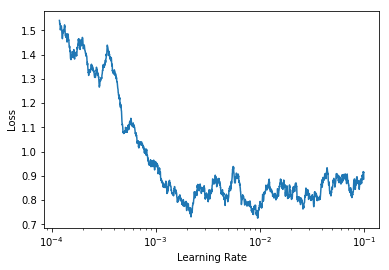

In [53]:
learner.plot_lrs(50)

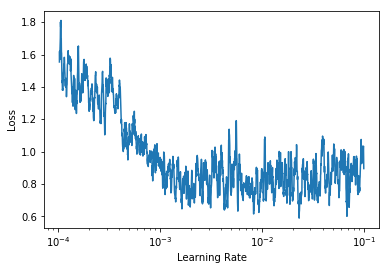

In [54]:
learner.plot_lrs(10)

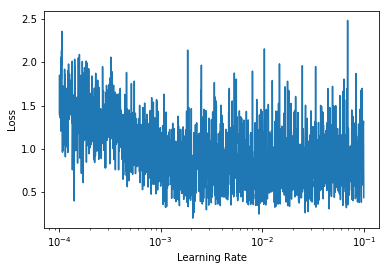

In [55]:
learner.plot_lrs(1)

In [56]:
del cfobj
torch.cuda.empty_cache()

In [57]:
cfobj=cf(n_users,n_emb_user,n_emb_movie,n_movies,min_rating,max_rating,autoenc_cols,dropout_e,hidden,\
         dropouts=[0.2,0.4,0.2])
cfobj=cfobj.to(device)

In [58]:
optimizer=torch.optim.Adam(cfobj.parameters(),lr=9e-4,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=0)

In [59]:
learner.run_epochs(dltrain,dlvalid,5)

Epoch:0 Learning rate 0.0009 Weight Decay 0.001 Train Loss:0.8653370232718195                 Valid Loss:0.8627716183393925 Train RMSE:0.9142136523238849 Valid RMSE:0.9165639193375977 Train MSE:0.8653370232718195 Valid MSE:0.8627716183393925                 Train MAE:0.749429738038053 Valid MAE:0.7610121956011197
Epoch:1 Learning rate 0.0009 Weight Decay 0.001 Train Loss:0.796986209492595                 Valid Loss:0.8645553025039466 Train RMSE:0.8775594466518488 Valid RMSE:0.9163024164964322 Train MSE:0.796986209492595 Valid MSE:0.8645553025039466                 Train MAE:0.70957553137465 Valid MAE:0.7627723249229225
Epoch:2 Learning rate 0.0009 Weight Decay 0.001 Train Loss:0.7902273675785939                 Valid Loss:0.8633671141154057 Train RMSE:0.8738220827592333 Valid RMSE:0.9164136647350712 Train MSE:0.7902273675785939 Valid MSE:0.8633671141154057                 Train MAE:0.7071405671122794 Valid MAE:0.7573176242478259
Epoch:3 Learning rate 0.0009 Weight Decay 0.001 Train Los

In [60]:
optimizer=torch.optim.Adam(cfobj.parameters(),lr=3e-3,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=3,start_lr=3e-3,end_lr=1e-4)

In [61]:
learner.run_epochs(dltrain,dlvalid,35)

Epoch:0 Learning rate 0.003 Weight Decay 0.001 Train Loss:0.7601821766415416                 Valid Loss:0.7850276117657756 Train RMSE:0.8570868388383677 Valid RMSE:0.8706570921592478 Train MSE:0.7601821766415416 Valid MSE:0.7850276117657756                 Train MAE:0.691170621974861 Valid MAE:0.7064290454795769
Epoch:1 Learning rate 0.0009654893846056299 Weight Decay 0.001 Train Loss:0.7276029854221946                 Valid Loss:0.749191270755218 Train RMSE:0.8375755499369247 Valid RMSE:0.8504589128563146 Train MSE:0.7276029854221946 Valid MSE:0.749191270755218                 Train MAE:0.6733128566800444 Valid MAE:0.6894861345624065
Epoch:2 Learning rate 0.00031072325059538597 Weight Decay 0.001 Train Loss:0.7099868832421887                 Valid Loss:0.7701823994651571 Train RMSE:0.827833343308973 Valid RMSE:0.8610651878337291 Train MSE:0.7099868832421887 Valid MSE:0.7701823994651571                 Train MAE:0.6640954525785919 Valid MAE:0.6961216236556973
Epoch:3 Learning rate 0.00

Epoch:25 Learning rate 0.0007504661601422218 Weight Decay 0.001 Train Loss:0.6944074273989925                 Valid Loss:0.7361265808880866 Train RMSE:0.817202762055704 Valid RMSE:0.8436327514806871 Train MSE:0.6944074273989925 Valid MSE:0.7361265808880866                 Train MAE:0.6556884488375353 Valid MAE:0.6834145368219496
Epoch:26 Learning rate 0.0006616417768614115 Weight Decay 0.001 Train Loss:0.693256574575162                 Valid Loss:0.7364173149606129 Train RMSE:0.8161029360612894 Valid RMSE:0.8441006098843814 Train MSE:0.693256574575162 Valid MSE:0.7364173149606129                 Train MAE:0.6536935628296199 Valid MAE:0.6790281577153249
Epoch:27 Learning rate 0.0005833305539124689 Weight Decay 0.001 Train Loss:0.6872040653339194                 Valid Loss:0.7631902585292721 Train RMSE:0.8131246074793703 Valid RMSE:0.8597621454892693 Train MSE:0.6872040653339194 Valid MSE:0.7631902585292721                 Train MAE:0.6512219463967059 Valid MAE:0.6967027661231187
Epoch:2

In [62]:
optimizer=torch.optim.Adam(cfobj.parameters(),lr=7e-4,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=3,start_lr=3e-3,end_lr=1e-4)

In [63]:
learner.run_epochs(dltrain,dlvalid,11)

Epoch:0 Learning rate 0.0007 Weight Decay 0.001 Train Loss:0.7241394776789379                 Valid Loss:0.723009229310461 Train RMSE:0.8352885416000227 Valid RMSE:0.8375539863685731 Train MSE:0.7241394776789379 Valid MSE:0.723009229310461                 Train MAE:0.6698108945092262 Valid MAE:0.6829555262853434
Epoch:1 Learning rate 0.0003659305710022972 Weight Decay 0.001 Train Loss:0.6972238028726998                 Valid Loss:0.6772457661929431 Train RMSE:0.8186769795628333 Valid RMSE:0.8082120838434005 Train MSE:0.6972238028726998 Valid MSE:0.6772457661929431                 Train MAE:0.6562935623396738 Valid MAE:0.643987977155694
Epoch:2 Learning rate 0.00019129311827723895 Weight Decay 0.001 Train Loss:0.6769621604284048                 Valid Loss:0.7061855153994517 Train RMSE:0.80686782909838 Valid RMSE:0.8252248397739717 Train MSE:0.6769621604284048 Valid MSE:0.7061855153994517                 Train MAE:0.6448473669346059 Valid MAE:0.6653219328538792
Epoch:3 Learning rate 0.00

In [68]:
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=3,start_lr=3e-3,end_lr=1e-4)

In [69]:
learner.run_epochs(dltrain,dlvalid,11)

Epoch:0 Learning rate 0.0001540989091653837 Weight Decay 0.001 Train Loss:0.6154238316167517                 Valid Loss:0.6709103924599854 Train RMSE:0.7682707336024287 Valid RMSE:0.8053430484488089 Train MSE:0.6154238316167517 Valid MSE:0.6709103924599854                 Train MAE:0.6100629622869391 Valid MAE:0.6344849980092263
Epoch:1 Learning rate 0.00013341347909034577 Weight Decay 0.001 Train Loss:0.6118569472729115                 Valid Loss:0.6806587927916028 Train RMSE:0.7664302203594024 Valid RMSE:0.8073874622207271 Train MSE:0.6118569472729115 Valid MSE:0.6806587927916028                 Train MAE:0.6089928747268097 Valid MAE:0.6367497624040724
Epoch:2 Learning rate 0.00011550475275517702 Weight Decay 0.001 Train Loss:0.6092494184381674                 Valid Loss:0.7203022640970376 Train RMSE:0.7651957374114912 Valid RMSE:0.8333537879688799 Train MSE:0.6092494184381674 Valid MSE:0.7203022640970376                 Train MAE:0.6060360166718498 Valid MAE:0.6621033200272569
Epoch

In [56]:
torch.save(cfobj,f=f'{DATAPATH}/inter/cfobj_0.8')
torch.save(learner,f=f'{DATAPATH}/inter/cfobj_learner_0.8')
torch.save(optimizer,f=f'{DATAPATH}/inter/cfobj_optimizer_0.8')
torch.save(cfobj.state_dict(),f'{DATAPATH}/inter/cfjobj_state_dict_0.8')
torch.save(optimizer.state_dict(),f'{DATAPATH}/inter/optimizer_state_dict_0.8')

/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [58]:
optimizer=torch.optim.Adam(cfobj.parameters(),lr=5e-3,betas=(0.9,0.999), weight_decay=wd)
learner=Learner(cfobj,optimizer,None,device,0,12000,0.25,cycle_mult=2,start_lr=4e-3,end_lr=4e-4)

In [59]:
learner.run_epochs(dltrain,dlvalid,7)

Epoch:0 Learning rate 0.005 Weight Decay 1e-07 Train Loss:0.7688108392421692                 Valid Loss:0.8395103987374304 Train RMSE:0.8405049054506085 Valid RMSE:0.8878992191182866
Epoch:1 Learning rate 0.001414213562373095 Weight Decay 1e-07 Train Loss:0.6852855704513303                 Valid Loss:0.7962183668636359 Train RMSE:0.7911723340280498 Valid RMSE:0.8582258179808255
Epoch:2 Learning rate 0.00039999999999999996 Weight Decay 1e-07 Train Loss:0.6516777085516686                 Valid Loss:0.7923312564391546 Train RMSE:0.7698911785179042 Valid RMSE:0.8544569945339336
Epoch:3 Learning rate 0.005 Weight Decay 1e-07 Train Loss:0.7115468788305521                 Valid Loss:0.8246223340867106 Train RMSE:0.8063665077801763 Valid RMSE:0.8733351202423749
Epoch:4 Learning rate 0.0026591479484724947 Weight Decay 1e-07 Train Loss:0.6632848583522735                 Valid Loss:0.7916696204801669 Train RMSE:0.7773447559516666 Valid RMSE:0.8545958497828119
Epoch:5 Learning rate 0.0014142135623

In [60]:
torch.save(cfobj,f=f'{DATAPATH}/inter/cfobj_improve_0.8')
torch.save(learner,f=f'{DATAPATH}/inter/cfobj_improve_learner_0.8')
torch.save(optimizer,f=f'{DATAPATH}/inter/cfobj_improve_optimizer_0.8')
torch.save(cfobj.state_dict(),f'{DATAPATH}/inter/cfjobj_improve_state_dict_0.8')
torch.save(optimizer.state_dict(),f'{DATAPATH}/inter/optimizer_improve_state_dict_0.8')

/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/kirana/anaconda3/lib/python3.7/site-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type cf. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
